In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [136]:
#parse_date = lambda x : pd.datetime.strptime(x, '%Y-%m-%d%H:%M:%S')

In [137]:
#df = pd.read_csv("../P39-CS3-Data/appdata10.csv",parse_dates = ['first_open'],date_parser = parse_date)
df = pd.read_csv("../P39-CS3-Data/appdata10.csv")

In [138]:
df.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [140]:
df['hour'] = df['hour'].str.slice(1,3).astype(int)


In [141]:
df.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [142]:
df2 = df.copy().drop(['user','enrolled','screen_list',"enrolled_date","first_open"],axis =1)

In [143]:
df2.shape

(50000, 7)

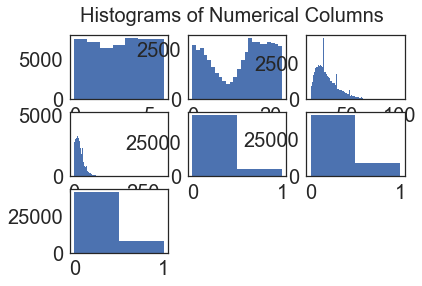

In [144]:
plt.suptitle('Histograms of Numerical Columns',fontsize = 20)
for i in range(1,df2.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title = (df2.columns.values[i-1])
    vals = np.size(df2.iloc[:,i-1].unique())
    plt.hist(df2.iloc[:,i-1],bins = vals)
#plt.tight_layout(rect = [0,0.03,1,0.95])

In [145]:
df2.corrwith(df['enrolled'])

dayofweek               0.011326
hour                   -0.066694
age                    -0.131303
numscreens              0.209457
minigame                0.104979
used_premium_feature   -0.052703
liked                  -0.007022
dtype: float64

In [146]:
 corr = df2.corr()

### Create a pretty heatmap of correlation matrix

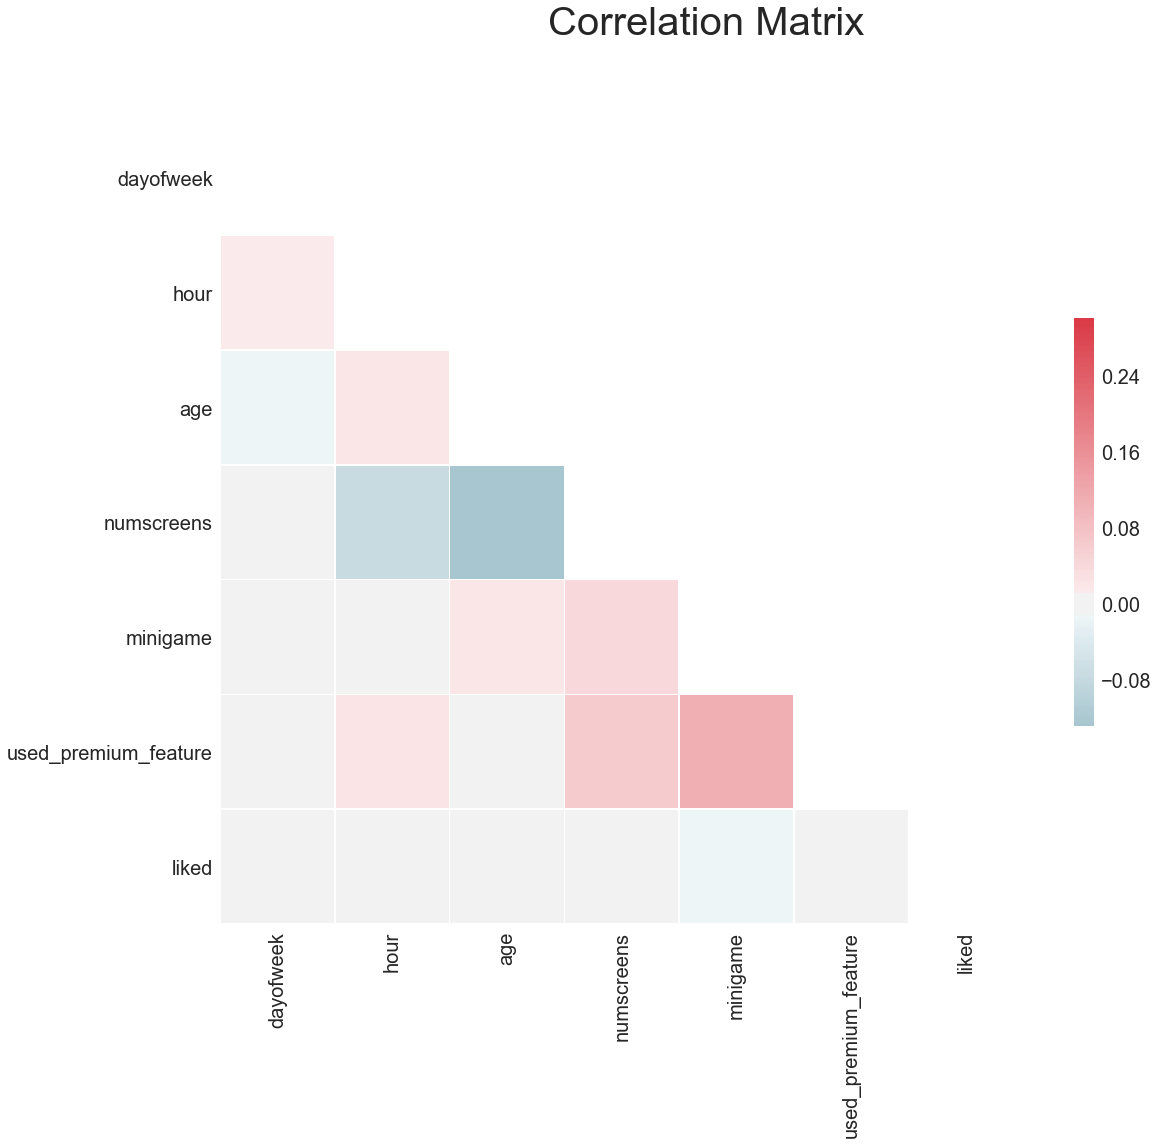

In [147]:
sns.set(style = "white",font_scale =2)
mask = np.zeros_like(corr,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize = (18,15))
f.suptitle("Correlation Matrix",fontsize = 40)
cmap = sns.diverging_palette(220,10,as_cmap = True)


sns.heatmap(corr,mask = mask, cmap = cmap, vmax = 0.3, center = 0, square = True, linewidth = 0.5, cbar_kws = {'shrink':0.5})

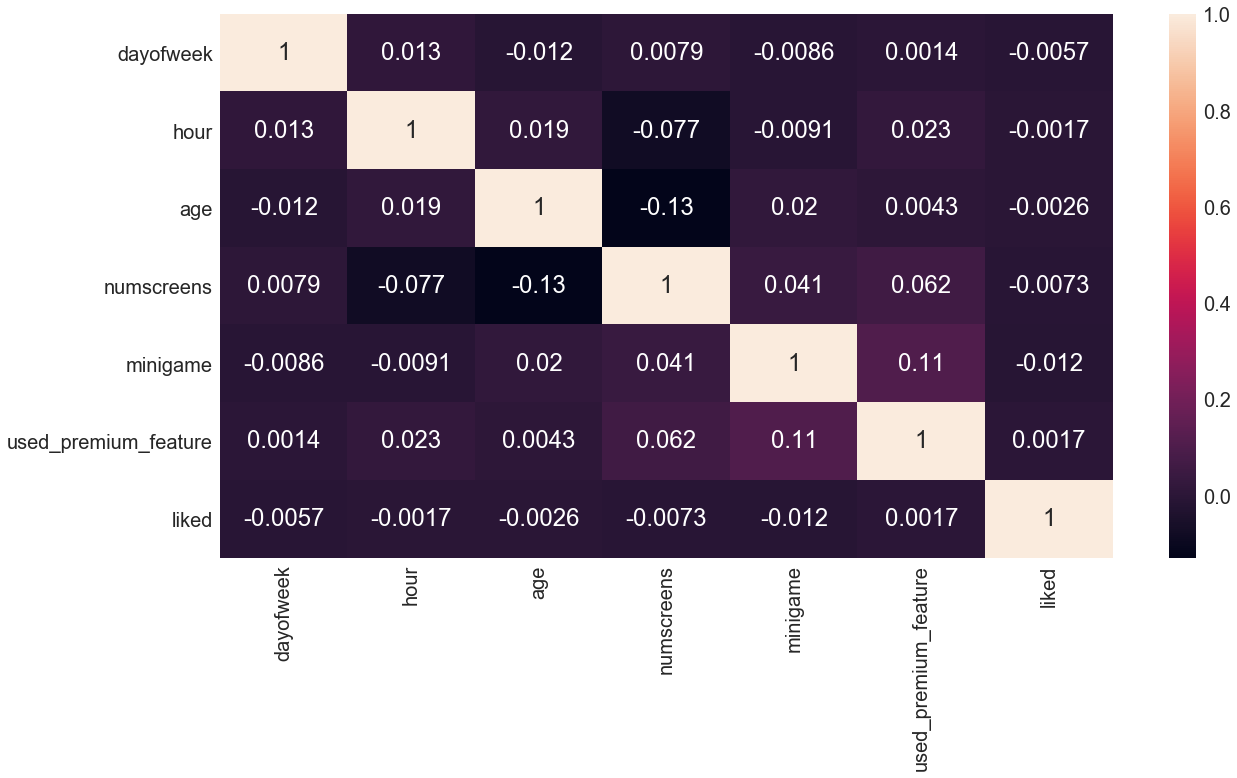

In [148]:
plt.figure(figsize = (20,10))
sns.heatmap(corr,annot = True)

In [149]:
from dateutil import parser

In [150]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [151]:
df['first_open'] = [parser.parse(date) for date in df['first_open']]

In [152]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date                   object
liked                            int64
dtype: object

In [153]:
df.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null datetime64[ns]
dayofweek               50000 non-null int64
hour                    50000 non-null int64
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 4.6+ MB


In [155]:
df['enrolled_date'] = [parser.parse(date) if isinstance(date,str) else date for date in df['enrolled_date']]

In [156]:
df['difference'] = (df['enrolled_date'] - df['first_open']).astype('timedelta64[h]')


In [157]:
df.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


In [158]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
difference                     float64
dtype: object

Text(0.5,1,'Distribution of Time-Since-First-Open')

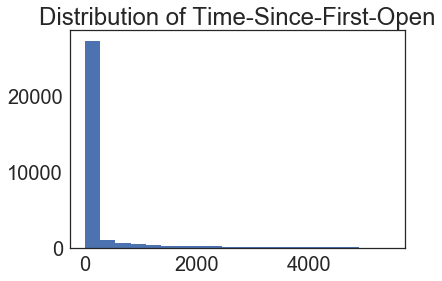

In [159]:
plt.hist(df['difference'].dropna(),bins = 20)
plt.title('Distribution of Time-Since-First-Open')

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

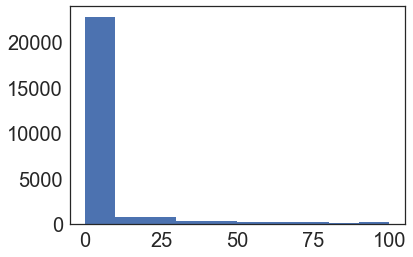

In [160]:
plt.hist(df['difference'].dropna(),range = [0,100])

In [161]:
df.loc[df['difference']>48,'enrolled'] = 0

In [162]:
df.head(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0
5,56480,2013-04-03 09:58:15.752,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0,0.0
6,144649,2012-12-25 02:33:18.461,1,2,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaT,0,NaN
7,249366,2012-12-11 03:07:49.875,1,3,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaT,0,NaN
8,372004,2013-03-20 14:22:01.569,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,0,2013-04-27 22:24:54.542,0,920.0
9,338013,2013-04-26 18:22:16.013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0,0.0


In [163]:
df = df.drop(['enrolled_date','difference','first_open'],axis = 1)

In [164]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'screen_list', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'liked'],
      dtype='object')

In [165]:
top_screens = pd.read_csv('../P39-CS3-Data/top_screens.csv')

In [166]:
top_screens['top_screens']

0                       Loan2
1                    location
2                Institutions
3            Credit3Container
4                 VerifyPhone
5            BankVerification
6           VerifyDateOfBirth
7                 ProfilePage
8               VerifyCountry
9                       Cycle
10                   idscreen
11           Credit3Dashboard
12                      Loan3
13                CC1Category
14                     Splash
15                       Loan
16                        CC1
17           RewardsContainer
18                    Credit3
19                    Credit1
20                EditProfile
21                    Credit2
22                   Finances
23                        CC3
24                    Saving9
25                    Saving1
26                     Alerts
27                    Saving8
28                   Saving10
29                Leaderboard
30                    Saving4
31               VerifyMobile
32              VerifyHousing
33        

In [167]:
df.dtypes

user                     int64
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
liked                    int64
dtype: object

In [168]:
df['screen_list'] = df['screen_list'].astype(str) + ","

In [169]:
for sc in top_screens['top_screens']:
    df[sc] = df['screen_list'].str.contains(sc).astype(int)
    df['screen_list'] = df['screen_list'].str.replace(sc+",","")
df['other'] = df['screen_list'].str.count(',')

In [170]:
df = df.drop('screen_list',axis =1)

In [171]:
saving_screens = ['Saving1','Saving2','Saving2Amount','Saving4','Saving5','Saving6','Saving7','Saving8','Saving9','Saving10']

In [172]:
df['SavingCount'] = df[saving_screens].sum(axis=1)

In [173]:
df = df.drop(saving_screens,axis =1)

In [174]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,10,0


In [175]:
cm_screens = ["Credit1","Credit2", "Credit3","Credit3Container", "Credit3Dashboard"] 
df['cm_screens'] = df[cm_screens].sum(axis=1)
df = df.drop(cm_screens,axis=1)

In [176]:
cc_screens = ['CC1','CC1Category','CC3']
df['ccCount']=df[cc_screens].sum(axis=1)
df=df.drop(cc_screens,axis=1)

In [178]:
loan_screens = ['Loan','Loan2','Loan3','Loan4']
df['loan_screens'] = df[loan_screens].sum(axis=1)
df = df.drop(loan_screens,axis=1)

In [179]:
df.head(10)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,cm_screens,ccCount,loan_screens
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
5,56480,2,9,20,14,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,1
6,144649,1,2,35,3,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
7,249366,1,3,26,41,0,1,0,0,0,...,0,0,1,0,0,8,0,2,0,1
8,372004,2,14,29,33,1,1,0,0,1,...,0,0,0,0,0,19,0,0,0,3
9,338013,4,18,26,19,0,0,1,0,1,...,0,0,0,0,0,11,0,0,0,1


In [181]:
y = df['enrolled']
X=df.drop('enrolled',axis =1)

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =0)

In [184]:
from sklearn.preprocessing import StandardScaler

In [193]:
train_identifier = X_train['user']
X_train = X_train.drop('user',axis =1)
test_identifier = X_test['user']
X_test = X_test.drop('user',axis =1)

In [199]:
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),columns =X_train.columns,index = X_train.index)
X_test_scaled =pd.DataFrame(sc.transform(X_test),columns = X_test.columns, index = X_test.index)

In [200]:
from sklearn.linear_model import LogisticRegression

In [201]:
classifier = LogisticRegression(random_state = 0, penalty = "l1")
classifier.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [202]:
y_predict = classifier.predict(X_test)

In [198]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score, recall_score

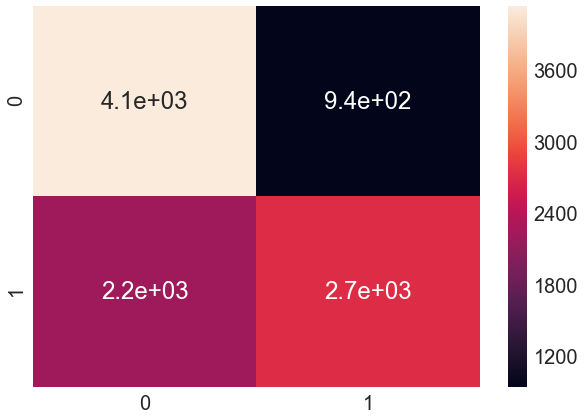

In [206]:
cm = confusion_matrix(y_test,y_predict)
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)

In [205]:
print(accuracy_score(y_test,y_predict))

0.6846


In [207]:
from sklearn.model_selection import cross_val_score

In [208]:
accuracies = cross_val_score(estimator = classifier, X=X_train,y=y_train,cv =10)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [209]:
final_results = pd.concat([y_test,test_identifier],axis =1)

In [210]:
final_results['predicted_results'] = y_predict

In [211]:
final_results.head(10)

,enrolled,user,predicted_results
11841,1,239786,1
19602,1,279644,1
45519,0,98290,0
25747,1,170150,1
42642,1,237568,0
31902,1,65042,0
30346,1,207226,1
12363,0,363062,0
32490,1,152296,1
26128,0,64484,0


In [229]:
final_results =final_results[['user','enrolled','predicted_results']].reset_index(drop = True);

In [230]:
from sklearn.model_selection import GridSearchCV

In [244]:
penalty = ['l1','l2']
C = [0.0001,0.01,0.1,1,10,100,1000]

In [245]:
param_grid =dict(C =C, penalty = penalty)

In [234]:
param_grid['C'] = C

In [235]:
param_grid['penalty'] = penalty

In [237]:
param_grid

{'C': [0.0001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

In [240]:
grid_search = GridSearchCV(estimator = classifier,param_grid = param_grid,cv =10, refit = True,verbose = 4)

In [241]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] C=0.0001, penalty=l1 ............................................
[CV] ................ C=0.0001, penalty=l1, score=0.673, total=   0.2s
[CV] C=0.0001, penalty=l1 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=0.0001, penalty=l1, score=0.660, total=   0.2s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ................ C=0.0001, penalty=l1, score=0.671, total=   0.2s
[CV] C=0.0001, penalty=l1 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=0.0001, penalty=l1, score=0.671, total=   0.1s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ................ C=0.0001, penalty=l1, score=0.662, total=   0.1s
[CV] C=0.0001, penalty=l1 ............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=0.0001, penalty=l1, score=0.670, total=   0.1s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ................ C=0.0001, penalty=l1, score=0.669, total=   0.1s
[CV] C=0.0001, penalty=l1 ............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=0.0001, penalty=l1, score=0.669, total=   0.1s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ................ C=0.0001, penalty=l1, score=0.658, total=   0.2s
[CV] C=0.0001, penalty=l1 ............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=0.0001, penalty=l1, score=0.669, total=   0.2s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ................ C=0.0001, penalty=l2, score=0.729, total=   0.2s
[CV] C=0.0001, penalty=l2 ............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=0.0001, penalty=l2, score=0.705, total=   0.2s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ................ C=0.0001, penalty=l2, score=0.731, total=   0.2s
[CV] C=0.0001, penalty=l2 ............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=0.0001, penalty=l2, score=0.724, total=   0.1s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ................ C=0.0001, penalty=l2, score=0.724, total=   0.1s
[CV] C=0.0001, penalty=l2 ............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=0.0001, penalty=l2, score=0.723, total=   0.2s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ................ C=0.0001, penalty=l2, score=0.724, total=   0.2s
[CV] C=0.0001, penalty=l2 ............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=0.0001, penalty=l2, score=0.728, total=   0.2s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ................ C=0.0001, penalty=l2, score=0.727, total=   0.1s
[CV] C=0.0001, penalty=l2 ............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................ C=0.0001, penalty=l2, score=0.717, total=   0.2s
[CV] C=0.01, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l1, score=0.766, total=   0.4s
[CV] C=0.01, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l1, score=0.761, total=   0.3s
[CV] C=0.01, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l1, score=0.774, total=   0.3s
[CV] C=0.01, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l1, score=0.758, total=   0.3s
[CV] C=0.01, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l1, score=0.759, total=   0.3s
[CV] C=0.01, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l1, score=0.759, total=   0.4s
[CV] C=0.01, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l1, score=0.764, total=   0.3s
[CV] C=0.01, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l1, score=0.766, total=   0.3s
[CV] C=0.01, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l1, score=0.770, total=   0.3s
[CV] C=0.01, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l1, score=0.752, total=   0.3s
[CV] C=0.01, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l2, score=0.769, total=   0.3s
[CV] C=0.01, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l2, score=0.763, total=   0.3s
[CV] C=0.01, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l2, score=0.774, total=   0.3s
[CV] C=0.01, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l2, score=0.765, total=   0.3s
[CV] C=0.01, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l2, score=0.762, total=   0.3s
[CV] C=0.01, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l2, score=0.761, total=   0.3s
[CV] C=0.01, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l2, score=0.762, total=   0.3s
[CV] C=0.01, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l2, score=0.764, total=   0.3s
[CV] C=0.01, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l2, score=0.770, total=   0.3s
[CV] C=0.01, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=0.01, penalty=l2, score=0.756, total=   0.3s
[CV] C=0.1, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l1, score=0.769, total=   0.5s
[CV] C=0.1, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l1, score=0.768, total=   0.4s
[CV] C=0.1, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l1, score=0.776, total=   0.4s
[CV] C=0.1, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l1, score=0.766, total=   0.4s
[CV] C=0.1, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l1, score=0.764, total=   0.5s
[CV] C=0.1, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l1, score=0.765, total=   0.4s
[CV] C=0.1, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l1, score=0.764, total=   0.4s
[CV] C=0.1, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l1, score=0.768, total=   0.4s
[CV] C=0.1, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l1, score=0.773, total=   0.4s
[CV] C=0.1, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l1, score=0.760, total=   0.4s
[CV] C=0.1, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l2, score=0.768, total=   0.4s
[CV] C=0.1, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l2, score=0.767, total=   0.4s
[CV] C=0.1, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l2, score=0.775, total=   0.4s
[CV] C=0.1, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l2, score=0.765, total=   0.3s
[CV] C=0.1, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l2, score=0.766, total=   0.4s
[CV] C=0.1, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l2, score=0.767, total=   0.4s
[CV] C=0.1, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l2, score=0.762, total=   0.4s
[CV] C=0.1, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l2, score=0.767, total=   0.4s
[CV] C=0.1, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l2, score=0.771, total=   0.4s
[CV] C=0.1, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=0.1, penalty=l2, score=0.758, total=   0.4s
[CV] C=1, penalty=l1 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l1, score=0.768, total=   0.4s
[CV] C=1, penalty=l1 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l1, score=0.767, total=   0.4s
[CV] C=1, penalty=l1 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l1, score=0.776, total=   0.4s
[CV] C=1, penalty=l1 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l1, score=0.766, total=   0.5s
[CV] C=1, penalty=l1 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l1, score=0.765, total=   0.4s
[CV] C=1, penalty=l1 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l1, score=0.767, total=   0.4s
[CV] C=1, penalty=l1 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l1, score=0.762, total=   0.4s
[CV] C=1, penalty=l1 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l1, score=0.767, total=   0.4s
[CV] C=1, penalty=l1 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l1, score=0.772, total=   0.4s
[CV] C=1, penalty=l1 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l1, score=0.758, total=   0.4s
[CV] C=1, penalty=l2 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l2, score=0.769, total=   0.4s
[CV] C=1, penalty=l2 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l2, score=0.766, total=   0.4s
[CV] C=1, penalty=l2 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l2, score=0.776, total=   0.6s
[CV] C=1, penalty=l2 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l2, score=0.766, total=   0.4s
[CV] C=1, penalty=l2 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l2, score=0.765, total=   0.5s
[CV] C=1, penalty=l2 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l2, score=0.768, total=   0.3s
[CV] C=1, penalty=l2 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l2, score=0.762, total=   0.4s
[CV] C=1, penalty=l2 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l2, score=0.766, total=   0.5s
[CV] C=1, penalty=l2 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l2, score=0.772, total=   0.6s
[CV] C=1, penalty=l2 .................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..................... C=1, penalty=l2, score=0.758, total=   0.6s
[CV] C=10, penalty=l1 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l1, score=0.769, total=   0.5s
[CV] C=10, penalty=l1 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l1, score=0.767, total=   0.5s
[CV] C=10, penalty=l1 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l1, score=0.777, total=   0.5s
[CV] C=10, penalty=l1 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l1, score=0.766, total=   0.6s
[CV] C=10, penalty=l1 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l1, score=0.765, total=   0.6s
[CV] C=10, penalty=l1 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l1, score=0.768, total=   0.5s
[CV] C=10, penalty=l1 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l1, score=0.762, total=   0.5s
[CV] C=10, penalty=l1 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l1, score=0.767, total=   0.6s
[CV] C=10, penalty=l1 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l1, score=0.772, total=   0.4s
[CV] C=10, penalty=l1 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l1, score=0.759, total=   0.4s
[CV] C=10, penalty=l2 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l2, score=0.768, total=   0.4s
[CV] C=10, penalty=l2 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l2, score=0.767, total=   0.4s
[CV] C=10, penalty=l2 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l2, score=0.777, total=   0.4s
[CV] C=10, penalty=l2 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l2, score=0.766, total=   0.5s
[CV] C=10, penalty=l2 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l2, score=0.765, total=   0.4s
[CV] C=10, penalty=l2 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l2, score=0.768, total=   0.6s
[CV] C=10, penalty=l2 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l2, score=0.762, total=   0.6s
[CV] C=10, penalty=l2 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l2, score=0.767, total=   0.5s
[CV] C=10, penalty=l2 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l2, score=0.772, total=   0.6s
[CV] C=10, penalty=l2 ................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................... C=10, penalty=l2, score=0.759, total=   0.5s
[CV] C=100, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l1, score=0.769, total=   0.5s
[CV] C=100, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l1, score=0.767, total=   0.5s
[CV] C=100, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l1, score=0.776, total=   0.4s
[CV] C=100, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l1, score=0.766, total=   0.4s
[CV] C=100, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l1, score=0.765, total=   0.5s
[CV] C=100, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l1, score=0.768, total=   0.7s
[CV] C=100, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l1, score=0.762, total=   0.4s
[CV] C=100, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l1, score=0.767, total=   0.4s
[CV] C=100, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l1, score=0.772, total=   0.4s
[CV] C=100, penalty=l1 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l1, score=0.759, total=   0.5s
[CV] C=100, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l2, score=0.768, total=   0.5s
[CV] C=100, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l2, score=0.766, total=   0.7s
[CV] C=100, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l2, score=0.777, total=   0.5s
[CV] C=100, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l2, score=0.766, total=   0.6s
[CV] C=100, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l2, score=0.765, total=   0.4s
[CV] C=100, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l2, score=0.768, total=   0.5s
[CV] C=100, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l2, score=0.762, total=   0.5s
[CV] C=100, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l2, score=0.767, total=   0.4s
[CV] C=100, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l2, score=0.772, total=   0.4s
[CV] C=100, penalty=l2 ...............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=100, penalty=l2, score=0.759, total=   0.4s
[CV] C=1000, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l1, score=0.769, total=   0.5s
[CV] C=1000, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l1, score=0.767, total=   0.4s
[CV] C=1000, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l1, score=0.776, total=   0.4s
[CV] C=1000, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l1, score=0.766, total=   0.4s
[CV] C=1000, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l1, score=0.765, total=   0.4s
[CV] C=1000, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l1, score=0.768, total=   0.5s
[CV] C=1000, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l1, score=0.762, total=   0.4s
[CV] C=1000, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l1, score=0.767, total=   0.4s
[CV] C=1000, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l1, score=0.772, total=   0.4s
[CV] C=1000, penalty=l1 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l1, score=0.759, total=   0.4s
[CV] C=1000, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l2, score=0.769, total=   0.4s
[CV] C=1000, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l2, score=0.767, total=   0.4s
[CV] C=1000, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l2, score=0.777, total=   0.4s
[CV] C=1000, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l2, score=0.766, total=   0.4s
[CV] C=1000, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l2, score=0.765, total=   0.4s
[CV] C=1000, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l2, score=0.768, total=   0.5s
[CV] C=1000, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l2, score=0.762, total=   0.4s
[CV] C=1000, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l2, score=0.767, total=   0.5s
[CV] C=1000, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l2, score=0.772, total=   0.5s
[CV] C=1000, penalty=l2 ..............................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .................. C=1000, penalty=l2, score=0.759, total=   0.4s


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   55.2s finished
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l1',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [243]:
grid_search.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [ ]:
d = dict